In [31]:
#%matplotlib notebook
import os
import sys
sys.path.append("numpy_path")
import numpy as np
import struct
from matplotlib import pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import RMSprop
import keras.callbacks as cb
from keras.callbacks import EarlyStopping, ModelCheckpoint
from math import cos, sin, pi
from statistics import mean
import os.path

# define loss history
class LossHistory(cb.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
    def on_batch_end(self, batch, logs={}):
        batch_loss = logs.get('loss')
        self.losses.append(batch_loss)

#plot losses
def plot_losses(losses):
    plt.plot(losses)
    plt.title('Loss per batch')
    plt.show()

def feature_scaling(X):
    X = X.T
    for i in range(7):
        mean = X[i].mean()
        std = X[i].std()
        X[i] = [(x - mean)/std for x in X[i]]
    return X.T

# input dimension
dim = 200

def init_model():
    model = Sequential()
    model.add(Dense(10, input_dim=dim))
    model.add(Activation('relu'))
    model.add(Dense(20))
    model.add(Activation('relu'))
    model.add(Dense(30))
    model.add(Activation('relu'))
    model.add(Dense(50))
    model.add(Activation('relu'))
    model.add(Dense(80))
    model.add(Activation('relu'))
    model.add(Dense(100))
    model.add(Activation('relu'))
    model.add(Dense(80))
    model.add(Activation('relu'))
    model.add(Dense(40))
    model.add(Activation('relu'))
    model.add(Dense(30))
    model.add(Activation('relu'))
    model.add(Dense(20))
    model.add(Activation('relu'))
    model.add(Dense(6))
    model.add(Activation('sigmoid'))
    # use mean squared error to measure the looses
    model.compile(loss=keras.losses.mean_squared_error,
              optimizer=keras.optimizers.Adam(lr = 0.001),
              metrics=['accuracy'])
    return model

In [47]:
SP = np.genfromtxt('DATA/DATA2X.txt')
SH = np.genfromtxt('DATA/DATA2Y.txt')

In [48]:
SP.shape

(7, 200)

In [49]:
for i in range(3, 50):
    if os.path.exists('DATA/DATA'+str(i)+'X.txt'):
        tmp = np.genfromtxt('DATA/DATA'+str(i)+'X.txt')
        #print(i, len(tmp))
        SP = np.concatenate((SP, tmp))
        tmp = np.genfromtxt('DATA/DATA'+str(i)+'Y.txt')
        #print(i, len(tmp))
        SH = np.concatenate((SH, tmp))
print('Total # of data: ' + str(len(SP)))

Total # of data: 389


In [52]:
filt = [6,12,23,24,43,71,72,69,67,72,*[x for x in range(75, 81)],89,*[x for x in range(97, 102)]
       ,109,110,114,127,*[x for x in range(154, 160)]
       ,163,168,178,179,180,181,195,196,202,207,216,217,230
       ,287,312,*[x for x in range(314, 321)],*[x for x in range(343, 349)], 362,369,375,386,388]
SP_F, SH_F = np.reshape(SP[0], (1, 200)),np.reshape(SH[0], (1, 6))
for i in range(1, len(SP)):
    #print(i)
    if i in filt:
        continue
    SP_F = np.concatenate((SP_F, np.reshape(SP[i], (1, 200))))
    SH_F = np.concatenate((SH_F, np.reshape(SH[i], (1, 6))))

In [53]:
SP_F.shape

(325, 200)

In [54]:
len(filt)

65

In [55]:
DATA = np.append(SP_F, SH_F, axis = 1)
np.random.shuffle(DATA)

X = DATA[:, :200]
Y = DATA[:,200:]
X = np.subtract(X, 0.5)
#keras.utils.normalize(X)

train_size = int(len(DATA) * 0.8)

train_X = X[0:train_size, :]
train_Y = Y[0:train_size, :]
test_X = X[train_size:, :]
test_Y = Y[train_size:, :]

Train on 260 samples, validate on 65 samples
Epoch 1/500
 - 2s - loss: 0.0386 - acc: 0.1231 - val_loss: 0.0120 - val_acc: 0.1231
Epoch 2/500
 - 0s - loss: 0.0111 - acc: 0.1269 - val_loss: 0.0094 - val_acc: 0.1231
Epoch 3/500
 - 0s - loss: 0.0090 - acc: 0.1500 - val_loss: 0.0078 - val_acc: 0.1385
Epoch 4/500
 - 0s - loss: 0.0085 - acc: 0.1731 - val_loss: 0.0074 - val_acc: 0.0923
Epoch 5/500
 - 0s - loss: 0.0077 - acc: 0.1500 - val_loss: 0.0071 - val_acc: 0.0923
Epoch 6/500
 - 0s - loss: 0.0078 - acc: 0.1538 - val_loss: 0.0073 - val_acc: 0.1231
Epoch 7/500
 - 0s - loss: 0.0072 - acc: 0.1538 - val_loss: 0.0059 - val_acc: 0.0923
Epoch 8/500
 - 0s - loss: 0.0062 - acc: 0.1308 - val_loss: 0.0054 - val_acc: 0.0769
Epoch 9/500
 - 0s - loss: 0.0059 - acc: 0.1500 - val_loss: 0.0061 - val_acc: 0.1231
Epoch 10/500
 - 0s - loss: 0.0068 - acc: 0.1577 - val_loss: 0.0055 - val_acc: 0.0923
Epoch 11/500
 - 0s - loss: 0.0052 - acc: 0.1654 - val_loss: 0.0045 - val_acc: 0.1077
Epoch 12/500
 - 0s - loss: 0.

Epoch 97/500
 - 0s - loss: 0.0022 - acc: 0.2846 - val_loss: 0.0047 - val_acc: 0.3077
Epoch 98/500
 - 0s - loss: 0.0026 - acc: 0.2615 - val_loss: 0.0040 - val_acc: 0.1231
Epoch 99/500
 - 0s - loss: 0.0025 - acc: 0.2808 - val_loss: 0.0041 - val_acc: 0.1846
Epoch 100/500
 - 0s - loss: 0.0023 - acc: 0.3077 - val_loss: 0.0046 - val_acc: 0.1692
Epoch 101/500
 - 0s - loss: 0.0023 - acc: 0.2538 - val_loss: 0.0041 - val_acc: 0.2615
Epoch 102/500
 - 0s - loss: 0.0021 - acc: 0.3423 - val_loss: 0.0041 - val_acc: 0.2154
Epoch 103/500
 - 0s - loss: 0.0021 - acc: 0.2808 - val_loss: 0.0040 - val_acc: 0.1846
Epoch 104/500
 - 0s - loss: 0.0022 - acc: 0.2577 - val_loss: 0.0040 - val_acc: 0.2308
Epoch 105/500
 - 0s - loss: 0.0021 - acc: 0.3808 - val_loss: 0.0043 - val_acc: 0.3077
Epoch 106/500
 - 0s - loss: 0.0021 - acc: 0.2846 - val_loss: 0.0045 - val_acc: 0.1846
Epoch 107/500
 - 0s - loss: 0.0022 - acc: 0.2769 - val_loss: 0.0043 - val_acc: 0.2000
Epoch 108/500
 - 0s - loss: 0.0022 - acc: 0.3846 - val_lo

Epoch 193/500
 - 0s - loss: 0.0020 - acc: 0.3615 - val_loss: 0.0047 - val_acc: 0.2000
Epoch 194/500
 - 0s - loss: 0.0019 - acc: 0.3538 - val_loss: 0.0044 - val_acc: 0.1846
Epoch 195/500
 - 0s - loss: 0.0019 - acc: 0.3538 - val_loss: 0.0045 - val_acc: 0.2154
Epoch 196/500
 - 0s - loss: 0.0019 - acc: 0.3808 - val_loss: 0.0052 - val_acc: 0.2615
Epoch 197/500
 - 0s - loss: 0.0019 - acc: 0.3731 - val_loss: 0.0045 - val_acc: 0.2308
Epoch 198/500
 - 0s - loss: 0.0019 - acc: 0.3538 - val_loss: 0.0046 - val_acc: 0.2154
Epoch 199/500
 - 0s - loss: 0.0020 - acc: 0.3615 - val_loss: 0.0042 - val_acc: 0.1692
Epoch 200/500
 - 0s - loss: 0.0022 - acc: 0.3115 - val_loss: 0.0045 - val_acc: 0.2462
Epoch 201/500
 - 0s - loss: 0.0021 - acc: 0.3577 - val_loss: 0.0045 - val_acc: 0.1692
Epoch 202/500
 - 0s - loss: 0.0018 - acc: 0.3846 - val_loss: 0.0045 - val_acc: 0.2308
Epoch 203/500
 - 0s - loss: 0.0018 - acc: 0.3885 - val_loss: 0.0046 - val_acc: 0.1846
Epoch 204/500
 - 0s - loss: 0.0019 - acc: 0.4385 - val

Epoch 289/500
 - 0s - loss: 0.0017 - acc: 0.3731 - val_loss: 0.0051 - val_acc: 0.2154
Epoch 290/500
 - 0s - loss: 0.0018 - acc: 0.4269 - val_loss: 0.0047 - val_acc: 0.2462
Epoch 291/500
 - 0s - loss: 0.0017 - acc: 0.3769 - val_loss: 0.0045 - val_acc: 0.2308
Epoch 292/500
 - 0s - loss: 0.0018 - acc: 0.3808 - val_loss: 0.0048 - val_acc: 0.2154
Epoch 293/500
 - 0s - loss: 0.0018 - acc: 0.3885 - val_loss: 0.0049 - val_acc: 0.2923
Epoch 294/500
 - 0s - loss: 0.0018 - acc: 0.4154 - val_loss: 0.0047 - val_acc: 0.2615
Epoch 295/500
 - 0s - loss: 0.0019 - acc: 0.3885 - val_loss: 0.0046 - val_acc: 0.2462
Epoch 296/500
 - 0s - loss: 0.0018 - acc: 0.4038 - val_loss: 0.0052 - val_acc: 0.1846
Epoch 297/500
 - 0s - loss: 0.0018 - acc: 0.4038 - val_loss: 0.0050 - val_acc: 0.2308
Epoch 298/500
 - 0s - loss: 0.0018 - acc: 0.4423 - val_loss: 0.0044 - val_acc: 0.1538
Epoch 299/500
 - 0s - loss: 0.0019 - acc: 0.4077 - val_loss: 0.0047 - val_acc: 0.2308
Epoch 300/500
 - 0s - loss: 0.0017 - acc: 0.4038 - val

Epoch 385/500
 - 0s - loss: 0.0017 - acc: 0.3692 - val_loss: 0.0051 - val_acc: 0.1846
Epoch 386/500
 - 0s - loss: 0.0017 - acc: 0.4654 - val_loss: 0.0051 - val_acc: 0.2000
Epoch 387/500
 - 0s - loss: 0.0017 - acc: 0.4423 - val_loss: 0.0047 - val_acc: 0.2000
Epoch 388/500
 - 0s - loss: 0.0017 - acc: 0.3885 - val_loss: 0.0052 - val_acc: 0.2154
Epoch 389/500
 - 0s - loss: 0.0016 - acc: 0.4538 - val_loss: 0.0048 - val_acc: 0.1846
Epoch 390/500
 - 0s - loss: 0.0016 - acc: 0.4538 - val_loss: 0.0051 - val_acc: 0.2308
Epoch 391/500
 - 0s - loss: 0.0016 - acc: 0.4500 - val_loss: 0.0049 - val_acc: 0.2000
Epoch 392/500
 - 0s - loss: 0.0016 - acc: 0.4346 - val_loss: 0.0052 - val_acc: 0.2154
Epoch 393/500
 - 0s - loss: 0.0016 - acc: 0.3962 - val_loss: 0.0054 - val_acc: 0.2000
Epoch 394/500
 - 0s - loss: 0.0017 - acc: 0.4615 - val_loss: 0.0050 - val_acc: 0.2154
Epoch 395/500
 - 0s - loss: 0.0016 - acc: 0.4154 - val_loss: 0.0051 - val_acc: 0.2308
Epoch 396/500
 - 0s - loss: 0.0016 - acc: 0.4308 - val

Epoch 481/500
 - 0s - loss: 0.0016 - acc: 0.4577 - val_loss: 0.0052 - val_acc: 0.1692
Epoch 482/500
 - 0s - loss: 0.0015 - acc: 0.4577 - val_loss: 0.0053 - val_acc: 0.2154
Epoch 483/500
 - 0s - loss: 0.0016 - acc: 0.4231 - val_loss: 0.0055 - val_acc: 0.2462
Epoch 484/500
 - 0s - loss: 0.0016 - acc: 0.4462 - val_loss: 0.0053 - val_acc: 0.2000
Epoch 485/500
 - 0s - loss: 0.0016 - acc: 0.4346 - val_loss: 0.0053 - val_acc: 0.2615
Epoch 486/500
 - 0s - loss: 0.0016 - acc: 0.4538 - val_loss: 0.0050 - val_acc: 0.2000
Epoch 487/500
 - 0s - loss: 0.0016 - acc: 0.4385 - val_loss: 0.0052 - val_acc: 0.2154
Epoch 488/500
 - 0s - loss: 0.0016 - acc: 0.5038 - val_loss: 0.0052 - val_acc: 0.1846
Epoch 489/500
 - 0s - loss: 0.0016 - acc: 0.4538 - val_loss: 0.0052 - val_acc: 0.2154
Epoch 490/500
 - 0s - loss: 0.0016 - acc: 0.4192 - val_loss: 0.0054 - val_acc: 0.2462
Epoch 491/500
 - 0s - loss: 0.0015 - acc: 0.4846 - val_loss: 0.0051 - val_acc: 0.2154
Epoch 492/500
 - 0s - loss: 0.0016 - acc: 0.4500 - val

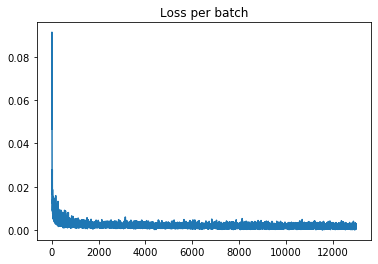

In [56]:
model = init_model()
history = LossHistory()
# when training, using minibatch seems to be pretty good
model.fit(train_X, train_Y, epochs=500, batch_size=10,
                callbacks=[history],
                validation_data=(test_X, test_Y), verbose=2)
score = model.evaluate(test_X, test_Y, batch_size=20)
print(score)
plot_losses(history.losses)

Test 0
True shape: [0.2963065 0.3       0.338636  0.4       0.338636  0.3      ]
Predicted shape: [[0.28571936 0.31026313 0.3503182  0.3859476  0.32345802 0.28863484]]



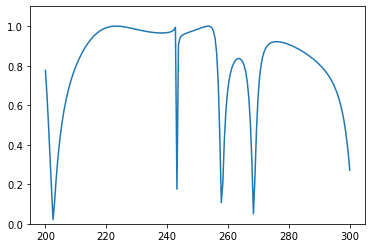

Test 1
True shape: [0.4        0.41826582 0.44988746 0.5        0.4389726  0.4       ]
Predicted shape: [[0.49462396 0.4893507  0.48621473 0.4991828  0.49169588 0.49366987]]



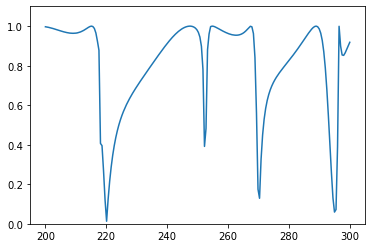

Test 2
True shape: [0.1        0.11044282 0.12680754 0.15329674 0.2        0.19753767]
Predicted shape: [[0.12090978 0.11425826 0.11445814 0.10769138 0.10962804 0.1118148 ]]



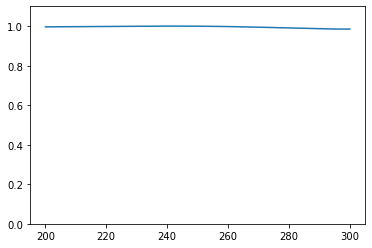

Test 3
True shape: [0.2963065  0.3        0.2370452  0.2        0.19753767 0.2       ]
Predicted shape: [[0.2783215  0.26100606 0.24721411 0.23570469 0.23045738 0.23399867]]



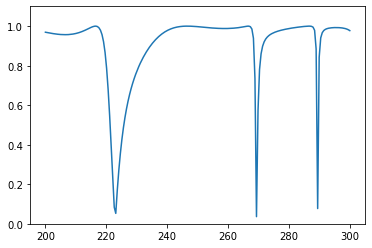

Test 4
True shape: [0.4        0.39015067 0.39015067 0.4        0.338636   0.3       ]
Predicted shape: [[0.3636202  0.34087867 0.325329   0.33002156 0.35687244 0.39777377]]



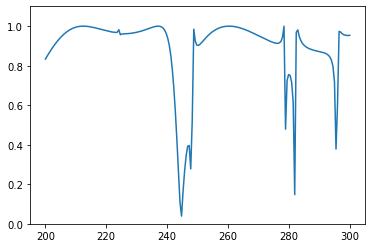

Test 5
True shape: [0.4        0.338636   0.3        0.31945452 0.35084526 0.4       ]
Predicted shape: [[0.37695637 0.37249774 0.37102023 0.3619337  0.3649491  0.36627445]]



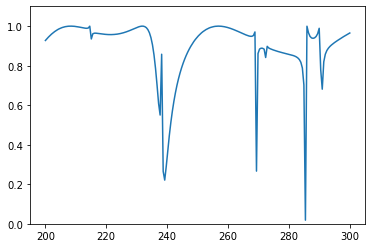

Test 6
True shape: [0.1        0.09753767 0.09753767 0.1        0.1        0.09876883]
Predicted shape: [[0.11787534 0.11126211 0.11124623 0.10490853 0.10721543 0.10963205]]



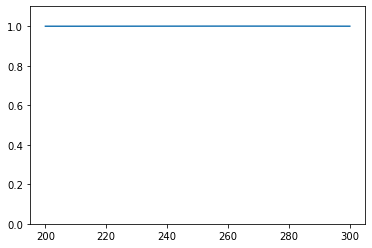

Test 7
True shape: [0.28531695 0.28887347 0.3        0.2        0.2370452  0.3       ]
Predicted shape: [[0.2604493  0.25205013 0.24875128 0.22955596 0.21976031 0.2150829 ]]



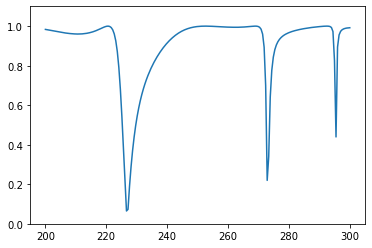

Test 8
True shape: [0.1        0.09876883 0.1        0.1        0.09629116 0.09510565]
Predicted shape: [[0.11787665 0.11126202 0.1112442  0.10490853 0.10721515 0.10963224]]



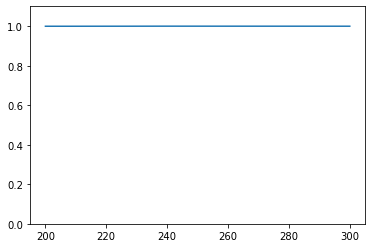

Test 9
True shape: [0.4        0.338636   0.3        0.25051498 0.21968701 0.2       ]
Predicted shape: [[0.37695637 0.37249774 0.37102023 0.3619337  0.3649491  0.36627445]]



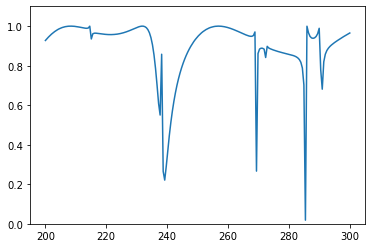

Test 10
True shape: [0.1902113  0.19258231 0.2        0.2        0.13169178 0.1       ]
Predicted shape: [[0.16104859 0.15179282 0.1457077  0.13322899 0.1477667  0.15358964]]



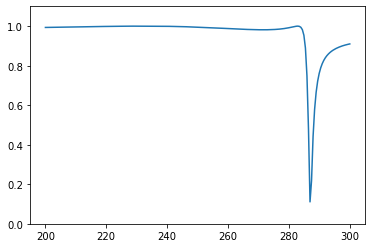

Test 11
True shape: [0.38042261 0.38516462 0.4        0.3        0.338636   0.4       ]
Predicted shape: [[0.38185984 0.3816131  0.3950171  0.3023286  0.24677818 0.21091205]]



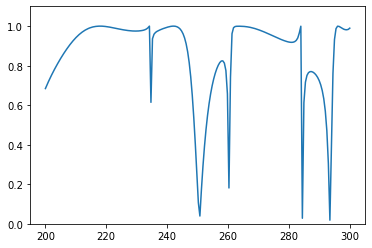

Test 12
True shape: [0.47552826 0.48145578 0.5        0.51662739 0.54836575 0.6       ]
Predicted shape: [[0.49873263 0.48748794 0.48267844 0.49323902 0.49500504 0.50129354]]



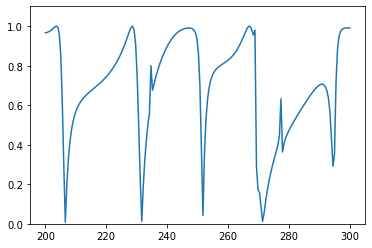

Test 13
True shape: [0.4        0.338636   0.3        0.3        0.28887347 0.28531695]
Predicted shape: [[0.3649726  0.35601902 0.36094728 0.39373246 0.38228378 0.37496418]]



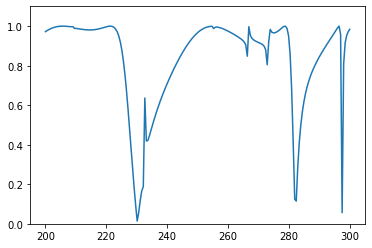

Test 14
True shape: [0.3        0.28887347 0.28531695 0.28887347 0.3        0.2       ]
Predicted shape: [[0.274703   0.26224166 0.26301163 0.2466236  0.2060503  0.19173999]]



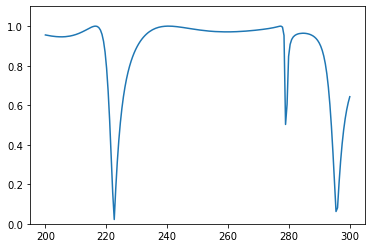

Test 15
True shape: [0.2        0.2370452  0.3        0.28105791 0.27063391 0.26730196]
Predicted shape: [[0.28556663 0.22625309 0.19999757 0.1717461  0.1618212  0.15674944]]



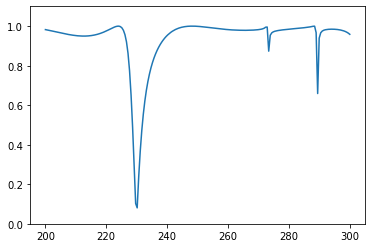

Test 16
True shape: [0.3       0.292613  0.292613  0.3       0.2963065 0.3      ]
Predicted shape: [[0.2960797  0.29574668 0.2921724  0.2855997  0.28612342 0.28543642]]



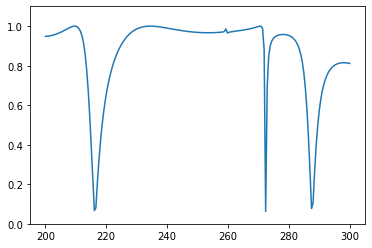

Test 17
True shape: [0.2        0.13169178 0.1        0.09368597 0.0902113  0.08910065]
Predicted shape: [[0.14520451 0.13355085 0.1514765  0.16941753 0.19702634 0.19858406]]



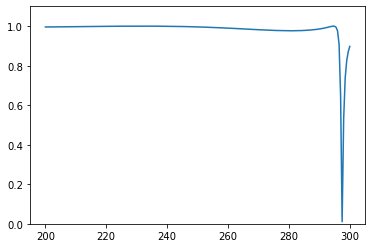

Test 18
True shape: [0.4        0.35084526 0.31945452 0.3        0.2370452  0.2       ]
Predicted shape: [[0.3636202  0.34087867 0.325329   0.33002156 0.35687244 0.39777377]]



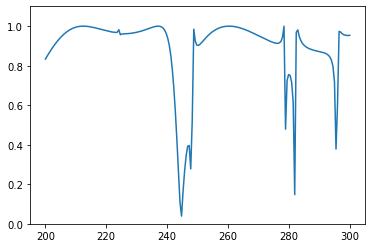

Test 19
True shape: [0.3        0.4        0.3631924  0.34026032 0.3276406  0.3236068 ]
Predicted shape: [[0.35601565 0.31189406 0.25980806 0.24940288 0.2420507  0.24969015]]



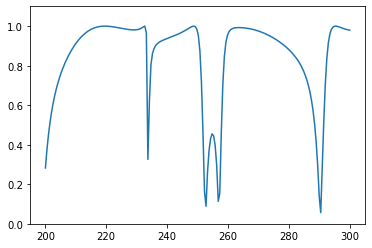

Test 20
True shape: [0.4        0.40597245 0.42269179 0.45246718 0.5        0.49384417]
Predicted shape: [[0.3883096  0.40442735 0.42888784 0.48077595 0.48301607 0.39709064]]



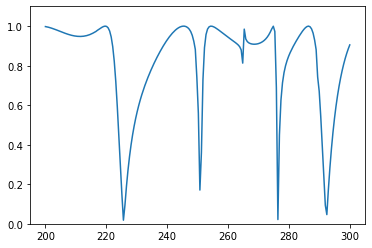

Test 21
True shape: [0.19753767 0.2        0.13169178 0.1        0.13169178 0.2       ]
Predicted shape: [[0.20291692 0.17410913 0.15537122 0.14206186 0.12832654 0.12687138]]



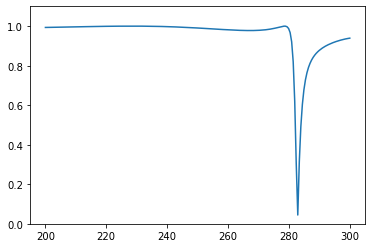

Test 22
True shape: [0.2        0.19507534 0.19507534 0.2        0.19753767 0.2       ]
Predicted shape: [[0.18095067 0.1772632  0.18391901 0.17251092 0.17763497 0.17869218]]



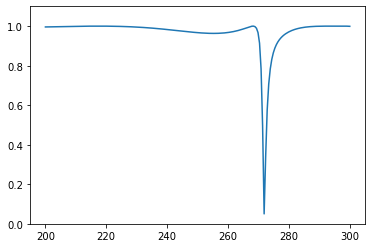

Test 23
True shape: [0.5        0.4        0.3631924  0.34026032 0.3276406  0.3236068 ]
Predicted shape: [[0.4709033  0.4882829  0.5040411  0.4863148  0.4825382  0.46937463]]



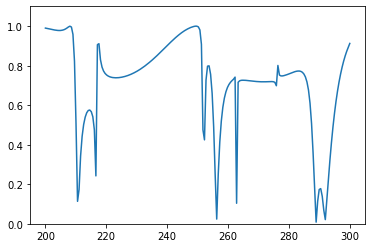

Test 24
True shape: [0.1        0.13169178 0.2        0.19753767 0.2        0.19753767]
Predicted shape: [[0.11850721 0.1144273  0.12001398 0.11416557 0.12182556 0.12272742]]



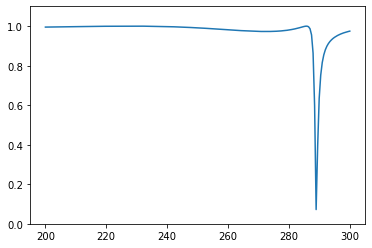

Test 25
True shape: [0.39507534 0.4        0.3631924  0.34026032 0.3276406  0.3236068 ]
Predicted shape: [[0.40033194 0.41098613 0.40392235 0.35795653 0.33385253 0.31500858]]



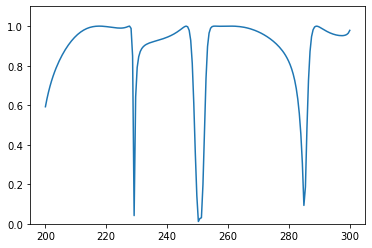

Test 26
True shape: [0.2        0.14600443 0.11723925 0.1        0.1        0.09876883]
Predicted shape: [[0.15506518 0.1523534  0.1783694  0.20166245 0.25272655 0.27740595]]



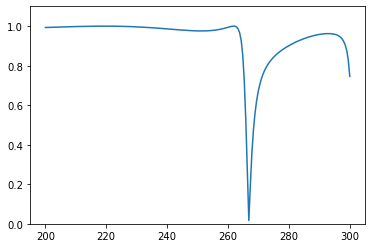

Test 27
True shape: [0.39507534 0.4        0.338636   0.3        0.28887347 0.28531695]
Predicted shape: [[0.32055947 0.32783657 0.3543778  0.40030134 0.389686   0.3833961 ]]



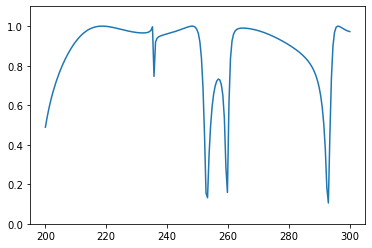

Test 28
True shape: [0.2        0.13169178 0.1        0.09876883 0.1        0.09876883]
Predicted shape: [[0.1682609  0.15055302 0.16797408 0.18922693 0.22814627 0.24165584]]



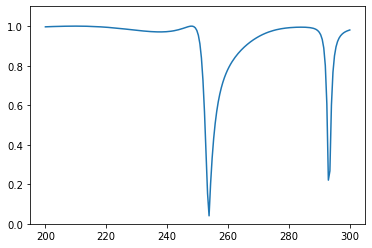

Test 29
True shape: [0.28284271 0.28636838 0.29739843 0.3174418  0.34961282 0.4       ]
Predicted shape: [[0.3102554  0.2897635  0.28168982 0.27006698 0.2709648  0.27455685]]



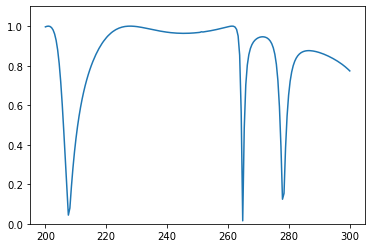

Test 30
True shape: [0.2        0.2370452  0.3        0.338636   0.4        0.39507534]
Predicted shape: [[0.31184363 0.24988073 0.22360593 0.1934616  0.186803   0.18170851]]



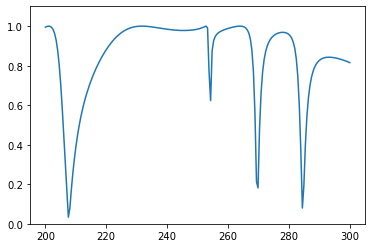

Test 31
True shape: [0.19753767 0.2        0.19753767 0.2        0.19258231 0.1902113 ]
Predicted shape: [[0.16766891 0.1641432  0.16779584 0.15652171 0.16001752 0.16182761]]



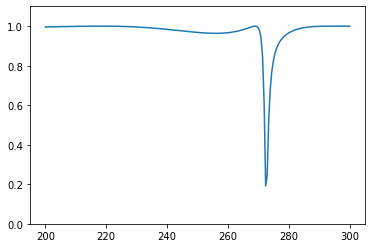

Test 32
True shape: [0.1        0.2        0.1815962  0.17013016 0.1638203  0.1618034 ]
Predicted shape: [[0.11557564 0.11021915 0.11250371 0.1056025  0.1070853  0.10844184]]



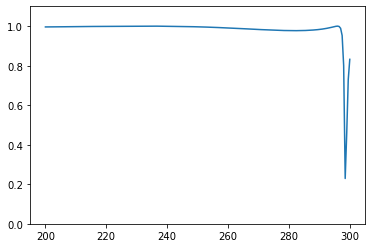

Test 33
True shape: [0.3       0.2963065 0.3       0.2963065 0.3       0.2963065]
Predicted shape: [[0.31184363 0.24988073 0.22360593 0.1934616  0.186803   0.18170851]]



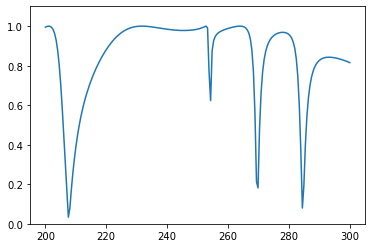

Test 34
True shape: [0.38042261 0.38516462 0.4        0.4        0.4389726  0.5       ]
Predicted shape: [[0.37376744 0.36697683 0.36852655 0.3649868  0.37962368 0.39385802]]



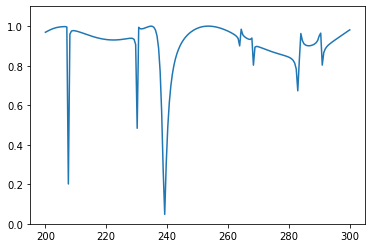

Test 35
True shape: [0.09876883 0.1        0.09629116 0.09510565 0.09629116 0.1       ]
Predicted shape: [[0.11784983 0.11123797 0.11122251 0.10488719 0.10719651 0.10961388]]



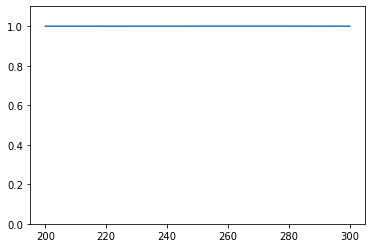

Test 36
True shape: [0.2       0.2370452 0.3       0.2963065 0.3       0.2963065]
Predicted shape: [[0.22437438 0.24041381 0.27072108 0.2963789  0.30230683 0.3127198 ]]



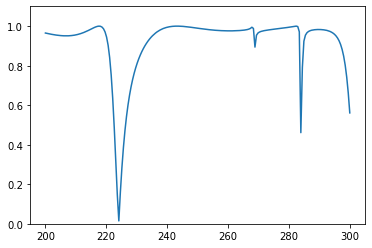

Test 37
True shape: [0.1        0.11723925 0.14600443 0.2        0.19258231 0.1902113 ]
Predicted shape: [[0.12063912 0.11390004 0.11392203 0.10700268 0.10914229 0.11139201]]



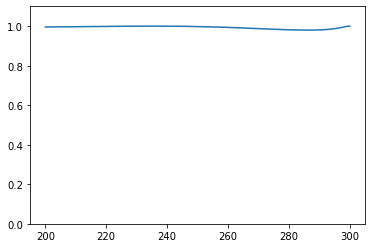

Test 38
True shape: [0.1902113  0.19258231 0.2        0.2        0.19753767 0.2       ]
Predicted shape: [[0.1731562  0.16959131 0.17460436 0.16314071 0.16646689 0.16771676]]



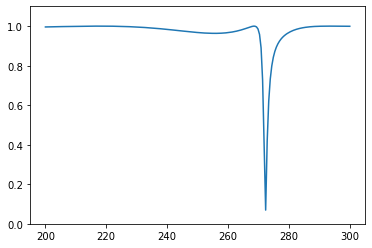

Test 39
True shape: [0.1        0.13169178 0.2        0.3        0.28887347 0.28531695]
Predicted shape: [[0.14225233 0.12755394 0.11398238 0.12302798 0.12601191 0.13562284]]



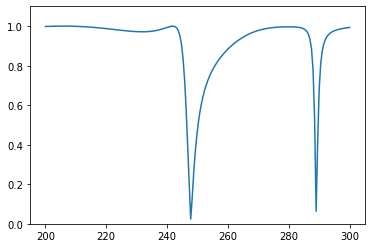

Test 40
True shape: [0.2        0.21968701 0.25051498 0.3        0.2370452  0.2       ]
Predicted shape: [[0.20195255 0.196872   0.1989612  0.1888527  0.19061542 0.19297948]]



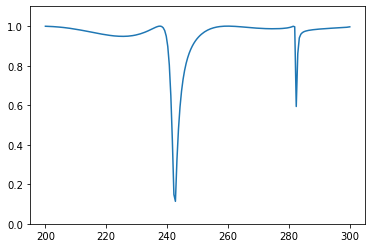

Test 41
True shape: [0.2963065  0.3        0.2723943  0.25519524 0.24573045 0.2427051 ]
Predicted shape: [[0.29510164 0.25504923 0.23526368 0.21468729 0.2086098  0.20876552]]



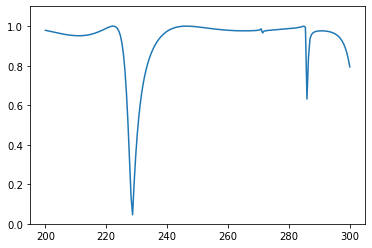

Test 42
True shape: [0.2963065 0.3       0.2963065 0.3       0.338636  0.4      ]
Predicted shape: [[0.24017406 0.22776267 0.22261682 0.2281912  0.22843733 0.23362218]]



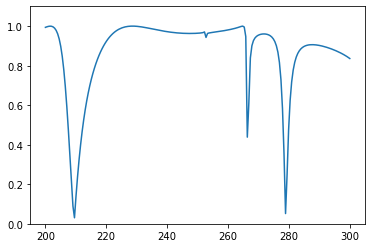

Test 43
True shape: [0.4        0.338636   0.3        0.2        0.19258231 0.1902113 ]
Predicted shape: [[0.3649726  0.35601902 0.36094728 0.39373246 0.38228378 0.37496418]]



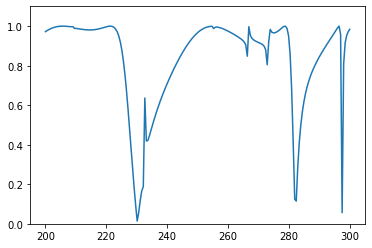

Test 44
True shape: [0.3        0.28503952 0.27802091 0.27802091 0.28503952 0.3       ]
Predicted shape: [[0.2893088  0.26849562 0.26127407 0.2447615  0.21802963 0.20911488]]



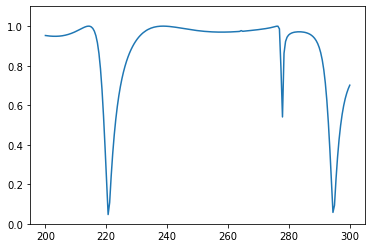

Test 45
True shape: [0.19753767 0.2        0.15329674 0.12680754 0.11044282 0.1       ]
Predicted shape: [[0.12043729 0.11379072 0.1139583  0.10726821 0.10926205 0.11148153]]



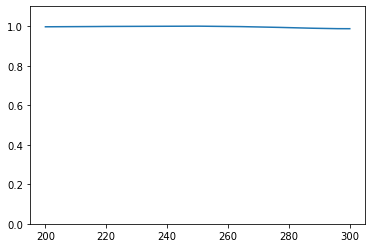

Test 46
True shape: [0.1        0.11044282 0.12680754 0.15329674 0.2        0.1       ]
Predicted shape: [[0.11935776 0.1127252  0.11281237 0.10630479 0.10844709 0.11075428]]



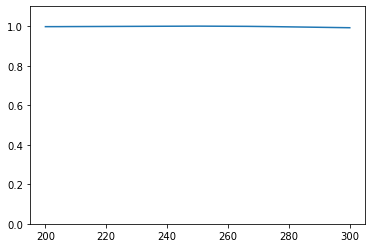

Test 47
True shape: [0.4        0.39507534 0.4        0.39507534 0.4        0.39507534]
Predicted shape: [[0.4031601  0.35253456 0.32362014 0.30147368 0.29485977 0.29529145]]



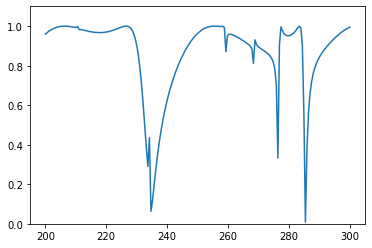

Test 48
True shape: [0.3        0.25051498 0.21968701 0.2        0.2370452  0.3       ]
Predicted shape: [[0.2727607  0.25352037 0.2383011  0.23004648 0.21615705 0.21753773]]



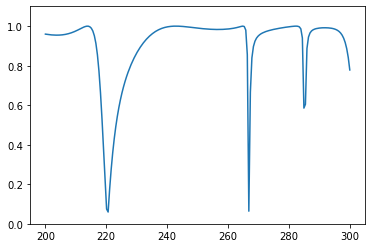

Test 49
True shape: [0.09876883 0.1        0.13169178 0.2        0.2370452  0.3       ]
Predicted shape: [[0.20291692 0.17410913 0.15537122 0.14206186 0.12832654 0.12687138]]



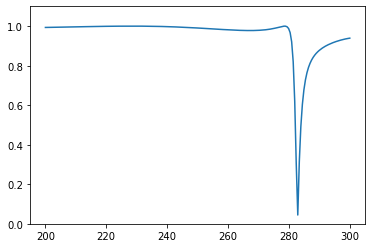

Test 50
True shape: [0.4        0.40597245 0.42269179 0.45246718 0.5        0.5       ]
Predicted shape: [[0.38199723 0.39494404 0.42600378 0.47409615 0.45052108 0.39940223]]



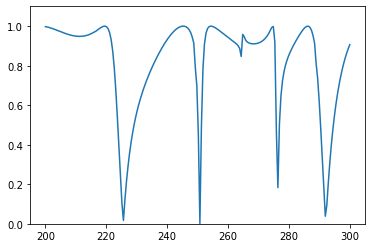

Test 51
True shape: [0.3        0.25051498 0.21968701 0.2        0.19258231 0.1902113 ]
Predicted shape: [[0.20780027 0.21687964 0.24128273 0.2627194  0.25583762 0.25255233]]



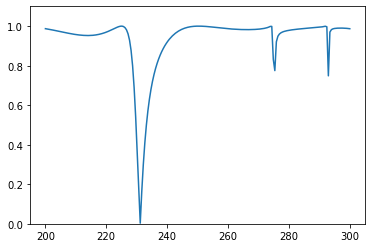

Test 52
True shape: [0.28531695 0.28887347 0.3        0.28105791 0.27063391 0.26730196]
Predicted shape: [[0.28294393 0.2652346  0.26025006 0.24042055 0.21196753 0.20185481]]



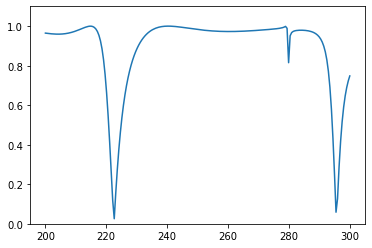

Test 53
True shape: [0.3        0.338636   0.4        0.4389726  0.5        0.49384417]
Predicted shape: [[0.4031601  0.35253456 0.32362014 0.30147368 0.29485977 0.29529145]]



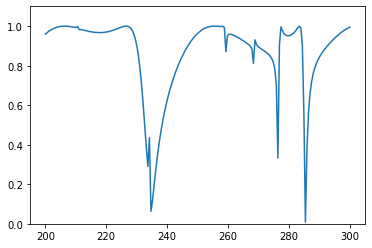

Test 54
True shape: [0.09876883 0.1        0.13169178 0.2        0.13169178 0.1       ]
Predicted shape: [[0.11903822 0.112398   0.11244777 0.10598543 0.10815668 0.11048927]]



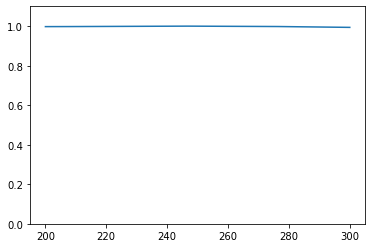

Test 55
True shape: [0.09876883 0.1        0.13169178 0.2        0.19258231 0.1902113 ]
Predicted shape: [[0.12136573 0.11462399 0.11474842 0.10781828 0.1096528  0.11181059]]



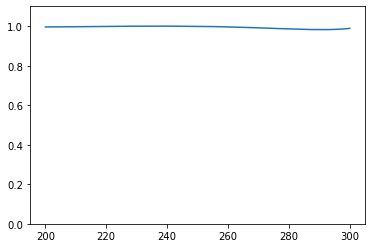

Test 56
True shape: [0.2        0.19507534 0.19507534 0.2        0.2        0.19753767]
Predicted shape: [[0.20179471 0.19031972 0.20338586 0.2233195  0.25971976 0.27694693]]



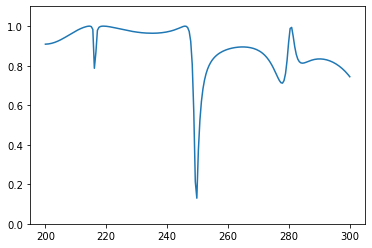

Test 57
True shape: [0.2963065  0.3        0.31945452 0.35084526 0.4        0.39507534]
Predicted shape: [[0.3410076  0.32615736 0.32254887 0.32671756 0.3490978  0.36811283]]



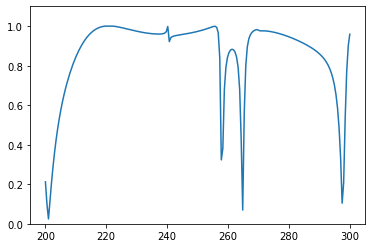

Test 58
True shape: [0.38042261 0.38516462 0.4        0.41826582 0.44988746 0.5       ]
Predicted shape: [[0.24604252 0.22880805 0.23392472 0.26375073 0.2747623  0.27665797]]



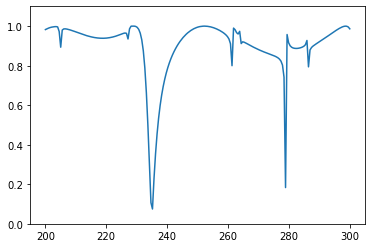

Test 59
True shape: [0.09510565 0.09629116 0.1        0.2        0.13169178 0.1       ]
Predicted shape: [[0.11861041 0.1119667  0.11197475 0.10556719 0.107781   0.11014695]]



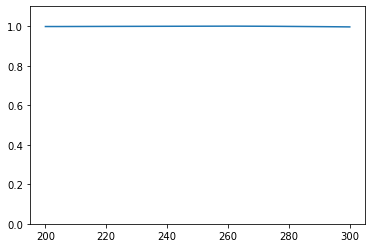

Test 60
True shape: [0.07071068 0.0715921  0.07434961 0.07936045 0.0874032  0.1       ]
Predicted shape: [[0.11775911 0.11115271 0.1111384  0.10480386 0.10712041 0.10954101]]



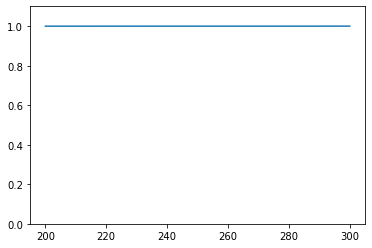

Test 61
True shape: [0.5        0.45246718 0.42269179 0.40597245 0.4        0.39507534]
Predicted shape: [[0.3883096  0.40442735 0.42888784 0.48077595 0.48301607 0.39709064]]



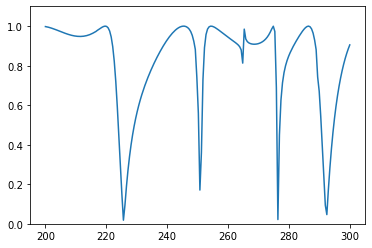

Test 62
True shape: [0.2        0.19753767 0.2        0.13169178 0.1        0.09876883]
Predicted shape: [[0.1682609  0.15055302 0.16797408 0.18922693 0.22814627 0.24165584]]



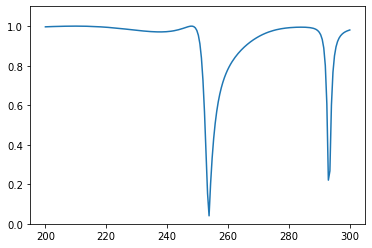

Test 63
True shape: [0.19753767 0.2        0.21968701 0.25051498 0.3        0.2963065 ]
Predicted shape: [[0.38583112 0.3796189  0.38182828 0.3800658  0.39065653 0.3978739 ]]



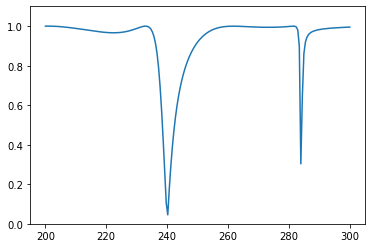

Test 64
True shape: [0.1        0.13169178 0.2        0.2        0.19258231 0.1902113 ]
Predicted shape: [[0.1420652  0.15635264 0.18923423 0.18606532 0.20204704 0.19755091]]



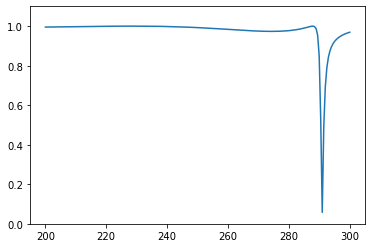

In [57]:
x = np.genfromtxt('meep_code/data/SP_xaxis.txt')
for i in range(len(test_X)):
    print('Test '+str(i))
    print('True shape: ' + str(test_Y[i]))
    print('Predicted shape: ' + str(model.predict(np.reshape(test_X[i], (1, 200))))+'\n')
    plt.ylim(0, 1.1)
    plt.plot(x, np.subtract(test_X[i], -0.5))
    plt.show()

raw data loss = 0.0022

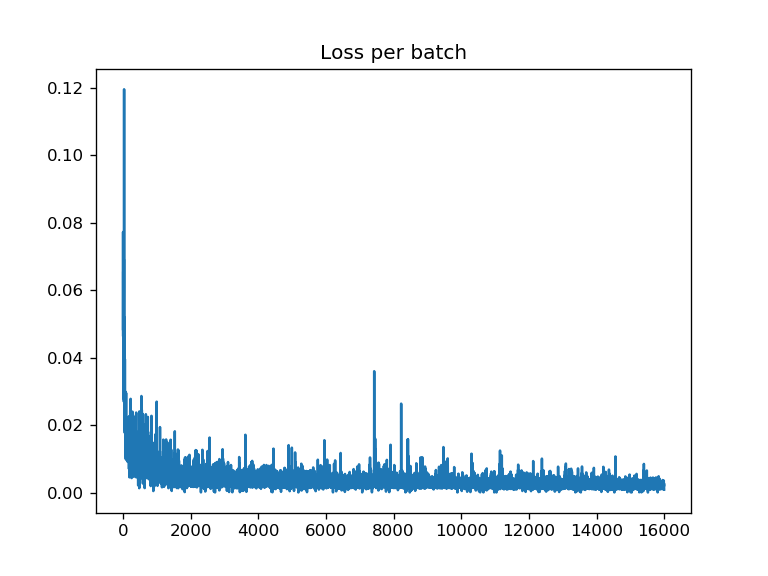

-0.5 normalize loss = 0.0016

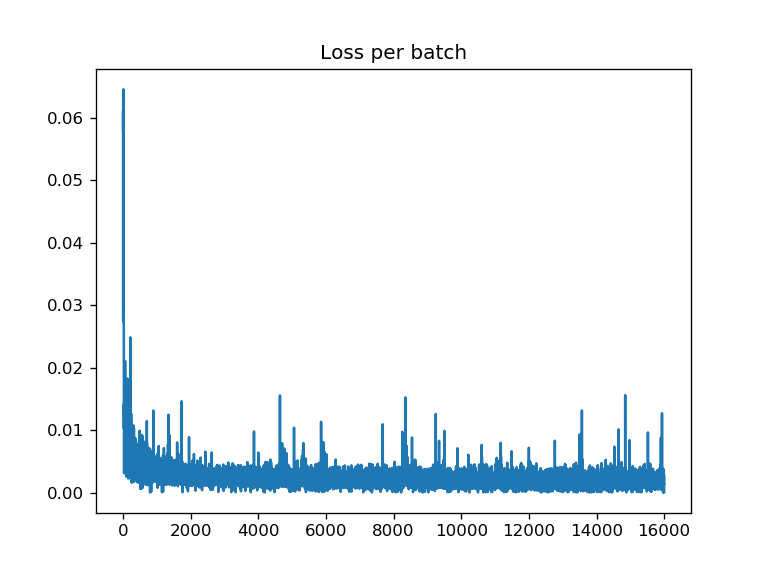

-0.5 not normalized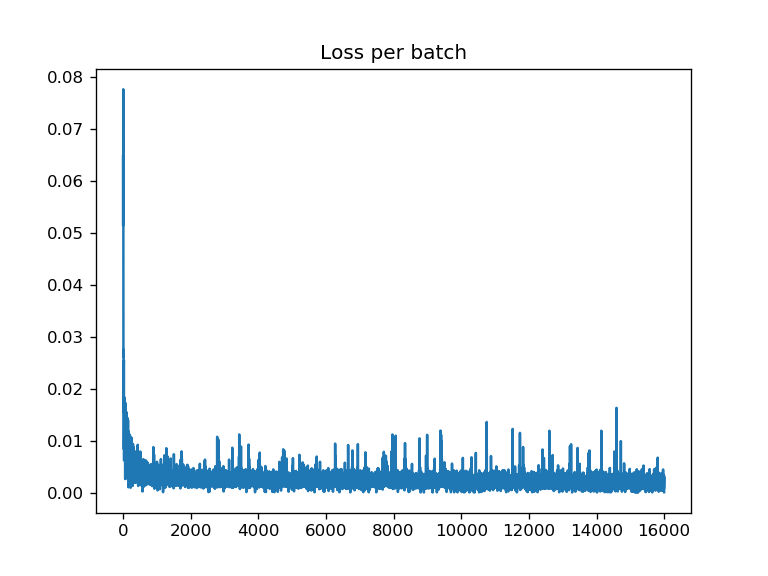

In [10]:
for i in range(len(test_X)):
    print('Test '+str(i))
    print('True shape: ' + str(test_Y[i]))
    print('Predicted shape: ' + str(model.predict(np.reshape(test_X[i], (1, 200))))+'\n')
    

Test 0
True shape: [0.2        0.17480641 0.1587209  0.14869921 0.14318419 0.14142136]
Predicted shape: [[0.09833518 0.10215363 0.1023652  0.10111508 0.10271542 0.09918966]]

Test 1
True shape: [0.49384417 0.5        0.4389726  0.4        0.4389726  0.5       ]
Predicted shape: [[0.47523662 0.47215676 0.45924208 0.4429709  0.43067187 0.42093578]]

Test 2
True shape: [0.39507534 0.4        0.35485183 0.32607652 0.30864787 0.3       ]
Predicted shape: [[0.31991267 0.33449268 0.34625506 0.3689741  0.38036034 0.34532884]]

Test 3
True shape: [0.47552826 0.48145578 0.5        0.5        0.49384417 0.5       ]
Predicted shape: [[0.47526106 0.47092906 0.47143123 0.44335935 0.430607   0.42395484]]

Test 4
True shape: [0.1        0.13169178 0.2        0.19507534 0.19507534 0.2       ]
Predicted shape: [[0.09027192 0.09437856 0.0943104  0.09369335 0.09453187 0.09038924]]

Test 5
True shape: [0.49384417 0.5        0.4539905  0.4253254  0.40955075 0.4045085 ]
Predicted shape: [[0.46458623 0.471905

Predicted shape: [[0.48677015 0.46702027 0.4336757  0.41958478 0.40852347 0.40238833]]

Test 76
True shape: [0.4        0.39507534 0.4        0.37474388 0.36084521 0.35640261]
Predicted shape: [[0.2217597  0.21930099 0.21772915 0.21100286 0.21701305 0.21851054]]

Test 77
True shape: [0.3        0.28887347 0.28531695 0.28887347 0.3        0.2       ]
Predicted shape: [[0.28413022 0.27508032 0.2685581  0.25606495 0.25122574 0.2516231 ]]



In [11]:
model.predict(np.reshape(test_X[1], (1, 200)))

array([[0.47523662, 0.47215676, 0.45924208, 0.4429709 , 0.43067187,
        0.42093578]], dtype=float32)

In [12]:
test_Y[1]

array([0.49384417, 0.5       , 0.4389726 , 0.4       , 0.4389726 ,
       0.5       ])

In [13]:
np.savetxt('Prediction/2019_7_15_1_p.txt', predict_Y[0])

NameError: name 'predict_Y' is not defined